# 산탄데르 고객 만족 예측
- [csv 파일](https://www.kaggle.com/c/santander-customer-satisfaction/data)
- target 0은 만족한 고객, 1은 불만족한 고객

## 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('../data/train_santander.csv', encoding='latin-1')
print(cust_df.shape)
cust_df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].replace(-999999, 2, inplace=True) # 결측치를 최빈값인 2로 대체
cust_df.drop('ID', axis=1, inplace=True) # 필요없는 feature 제거

X_features = cust_df.iloc[:, :-1]
y_label = cust_df.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 모델 학습, 하이퍼 파라미터 튜닝

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb.config_context(verbosity=0)
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100,
           eval_metric="auc", eval_set=[(X_test, y_test)], verbose = 0)

pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[14566     4]
 [  633     1]]
정확도: 0.9581, 정밀도: 0.2000, 재현율: 0.0016, F1: 0.0031, AUC:0.8413


In [9]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100) # 수행 속도 증가를 위해 감소

params = {
    'max_depth':[5, 7],
    'min_child_weight':[1, 3],
    'colsample_bytree':[0.5, 0.75]
}

gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
          eval_set=[(X_test, y_test)], verbose = 0)

print('최적 파라미터 :', gridcv.best_params_)

pred = gridcv.best_estimator_.predict(X_test)
pred_proba = gridcv.best_estimator_.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

최적 파라미터 : {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
오차 행렬
[[14569     1]
 [  632     2]]
정확도: 0.9584, 정밀도: 0.6667, 재현율: 0.0032, F1: 0.0063, AUC:0.8445


In [12]:
# 최적 파라미터 + 일부 수정
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02,
                       max_depth=5, colsample_bytree=0.5, min_child_weight=3, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,eval_metric='auc',
          eval_set=[(X_test, y_test)], verbose = 0)

pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[14570     0]
 [  632     2]]
정확도: 0.9584, 정밀도: 1.0000, 재현율: 0.0032, F1: 0.0063, AUC:0.8463


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

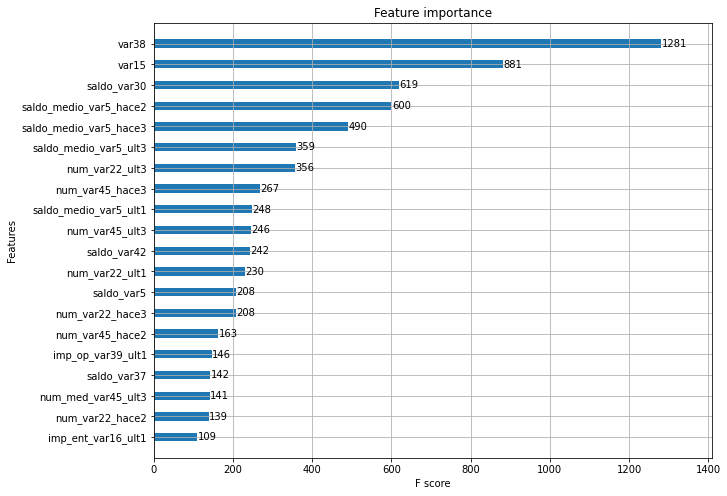

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## LightGBM 모델 학습, 하이퍼 파라미터 튜닝

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=evals, verbose=0)

pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[14569     1]
 [  632     2]]
정확도: 0.9584, 정밀도: 0.6667, 재현율: 0.0032, F1: 0.0063, AUC:0.8409


In [17]:
lgbm_clf = LGBMClassifier(n_estimators=200)

params={
    'num_leaves':[32, 64],
    'max_depth':[128, 160],
    'min_child_samples':[60, 100],
    'subsample':[0.8, 1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

print('최적 파라미터 :', gridcv.best_params_)

pred = gridcv.best_estimator_.predict(X_test)
pred_proba = gridcv.best_estimator_.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

최적 파라미터 : {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
오차 행렬
[[14570     0]
 [  634     0]]
정확도: 0.9583, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, AUC:0.8417


In [18]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, min_child_samples=100, max_depth=128, subsample=0.8)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=evals, verbose=0)

pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[14570     0]
 [  634     0]]
정확도: 0.9583, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, AUC:0.8417
